In [296]:
#  importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import datetime
from datetime import timedelta

In [297]:
#Loaading CSV data into Pandas Dataframe
user_engagement_df = pd.read_csv("takehome_user_engagement_1.csv", encoding='latin-1',parse_dates=True)
user_data_df = pd.read_csv("takehome_users_2.csv", encoding='latin-1',parse_dates=True)

In [298]:
user_engagement_df.head(2)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1


In [299]:
user_data_df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [300]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [301]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [302]:
# Overall Null value checks in both dataframe
print(f"Null Values in user_engagement_df dataframe: {user_engagement_df.isnull().sum().sum()}")
print(f"Null Values in user_data_df dataframe: {user_data_df.isnull().sum().sum()}")


Null Values in user_engagement_df dataframe: 0
Null Values in user_data_df dataframe: 8760


In [303]:
# Checking Null Values by Column in User Data Dataframe
user_data_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [304]:
# Parsing creation_time, last_session_creation time into Datetime format
user_data_df.creation_time = pd.to_datetime(user_data_df.creation_time)
user_data_df.last_session_creation_time = pd.to_datetime(user_data_df.last_session_creation_time,unit='s')

In [305]:
#set the time_stamp to datetime and the set it as the index
user_engagement_df.time_stamp = pd.to_datetime(user_engagement_df.time_stamp)
user_engagement_df = user_engagement_df.set_index('time_stamp', drop= True)

In [306]:
user_engagement_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [307]:
# Function takes the Object_id as input and returns the user is adopted or not 
def isUserAdopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = user_engagement_df.loc[user_engagement_df['user_id'] == x] #select all rows for the current user_id
    df_temp = df_temp.groupby(pd.Grouper( freq='D')).mean().dropna() #use to show active in a day and take mean of that
    is_adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            is_adopted = 1
            break
        else:
            is_adopted = 0
    return is_adopted


In [308]:
#Fetch object_id oof each user and call function isUserAdopted and update the dataframe with the function return status
user_data_df['adopted_user'] = user_data_df['object_id'].apply(isUserAdopted)

In [309]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)


In [310]:
# adopted_user_count holds the value of the total adopted users
adopted_user_count = sum(user_data_df['adopted_user'])
adopted_user_percentage = sum(user_data_df.adopted_user)/len(user_data_df.adopted_user)*100

print(f"total adopted user from" , len(user_data_df) ,"is",adopted_user_count)
print(f"total adopted user percentage from" , len(user_data_df) ,"is",adopted_user_percentage,"%")

total adopted user from 12000 is 1656
total adopted user percentage from 12000 is 13.8 %


In [311]:
# Missing value imputation by 0 in invited_by_user_id column
user_data_df.invited_by_user_id  = user_data_df.invited_by_user_id.fillna(0).astype(int)

In [312]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  int32         
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(5), object(3)
me

In [313]:
user_data_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
adopted_user                     0
dtype: int64

In [314]:
user_data_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0


In [315]:

# Extract domain from email addresses
user_data_df['domain'] = user_data_df['email'].str.split('@').str[1]

# Get domain counts to understand most partiipating domains
domain_counts = user_data_df['domain'].value_counts()
top_10_domain = domain_counts.head(10)

print(domain_counts)
print(top_10_domain)

print()

## top 6 domins in email covers 90% users
print(domain_counts.head(6).sum()/len(user_data_df['email'])*100)




domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: count, Length: 1184, dtype: int64
domain
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
rerwl.com            2
oqpze.com            2
qgjbc.com            2
dqwln.com            2
Name: count, dtype: int64

90.11666666666667


In [316]:
user_data_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,1,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,yahoo.com


In [317]:

# Calculate user life span
user_data_df['user_life_span'] = user_data_df['last_session_creation_time'] - user_data_df['creation_time']
user_data_df['user_life_span'] = user_data_df['user_life_span'].fillna(pd.Timedelta(seconds=0))

# Convert time differences to numeric values in days
user_data_df['user_life_span_days'] = user_data_df['user_life_span'].dt.days

# Drop unnecessary columns
column_to_drop = ['object_id', 'name', 'email', 'last_session_creation_time', 'creation_time', 'user_life_span']
user_data_df.drop(columns=column_to_drop, inplace=True)



In [318]:
# using label encodin to convert categorical features to numerical features. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
creation_labels = le.fit_transform(user_data_df['creation_source'])
user_data_df.creation_source = creation_labels

org_id_labels = le.fit_transform(user_data_df['org_id'])
user_data_df.org_id = org_id_labels

invited_labels = le.fit_transform(user_data_df['invited_by_user_id'])
user_data_df.org_id = invited_labels

email_labels = le.fit_transform(user_data_df['domain'])
user_data_df.domain = email_labels

In [319]:
user_data_df.head(5)

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain,user_life_span_days
0,0,1,0,2325,10803,0,1112,0
1,1,0,0,56,316,1,306,136
2,1,0,0,298,1525,0,306,0
3,0,0,0,1104,5151,0,1112,1
4,0,0,0,1127,5240,0,1112,5


In [320]:
# X holds the indepandent features of the dataset
# y holds the target feature(adopted_user) of the dataset
from sklearn.model_selection import train_test_split

X = user_data_df.drop('adopted_user', axis=1)
y = user_data_df.adopted_user

#Converting X, y into train test split set with trainig set size = 75% and test set size = 25%
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [274]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   creation_source             12000 non-null  int32
 1   opted_in_to_mailing_list    12000 non-null  int64
 2   enabled_for_marketing_drip  12000 non-null  int64
 3   org_id                      12000 non-null  int64
 4   invited_by_user_id          12000 non-null  int32
 5   domain                      12000 non-null  int32
 6   user_life_span_days         12000 non-null  int64
dtypes: int32(3), int64(4)
memory usage: 515.8 KB


In [321]:
from sklearn.ensemble import RandomForestClassifier

# fitting the model onto test data and checking model accuracy 
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.9726666666666667

In [322]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix 
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2580
           1       0.91      0.90      0.90       420

    accuracy                           0.97      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.97      0.97      0.97      3000

confusion matrix:
[[2542   38]
 [  44  376]]


In [323]:
# creating a dataframe display the coffecients
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(10)

user_life_span_days           0.913913
invited_by_user_id            0.023263
org_id                        0.022948
domain                        0.021799
creation_source               0.011378
opted_in_to_mailing_list      0.003772
enabled_for_marketing_drip    0.002927
Name: coef, dtype: float64

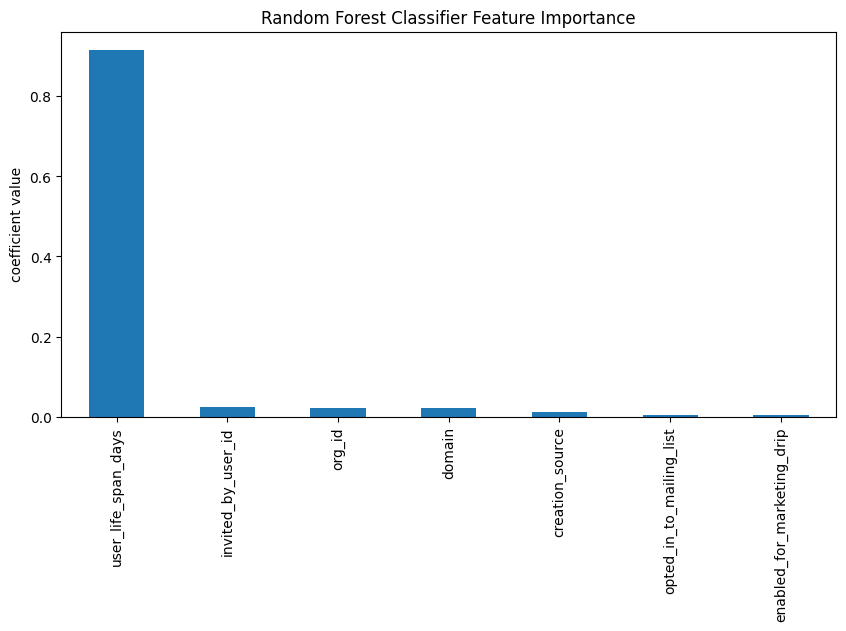

In [282]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()